In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Importing the data

In [2]:
df=pd.read_csv("churn.csv") #load csv file

# Understanding the data

In [3]:
df #checkout our data set

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum() #check if there is any null values in our dataset

In [5]:
col_list=list(df.columns.values) #to understand our dataset more precisily (unique fuction to see how many type of values are)
for i in range(len(col_list)):
    print(i,col_list[i],":",df[col_list[i]].unique())

# Data Manipulation

In [6]:
#columns like 'PaymentMethod', 'InternetService' needed to get dummies because the is no way to classify them
pay_meth = pd.get_dummies(df['PaymentMethod'])
internet_service = pd.get_dummies(df['InternetService'])

In [7]:
#concat the columns of dummy variables
df= pd.concat([df,pay_meth], axis=1)

In [8]:
df= pd.concat([df,internet_service], axis=1)

In [9]:
#lets drop unwanted columns
df= df.drop(['InternetService','PaymentMethod','customerID' ,'No'], axis=1)

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,...,Yes,29.85,29.85,No,0,0,1,0,1,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,No,56.95,1889.5,No,0,0,0,1,1,0
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,Yes,53.85,108.15,Yes,0,0,0,1,1,0
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,...,No,42.30,1840.75,No,1,0,0,0,1,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,Yes,70.70,151.65,Yes,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,Yes,84.80,1990.5,No,0,0,0,1,1,0
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,Yes,103.20,7362.9,No,0,1,0,0,0,1
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,...,Yes,29.60,346.45,No,0,0,1,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,...,Yes,74.40,306.6,Yes,0,0,0,1,0,1


In [11]:
#classifier or model don't take string values so i will replace Yes by '1' and No by '0'
df = df.replace(to_replace = 'Yes', value=1)

df = df.replace(to_replace = 'No', value=0)

df = df.replace(to_replace = 'Female', value=0)

df = df.replace(to_replace = 'Male', value=1)

# people or customer with 'No internet service' 'No phone service' i will consider there values 'Zero' in there respective columns
df = df.replace(to_replace = 'No internet service', value=0)
df = df.replace(to_replace = 'No phone service', value=0)

# In PaymentMethod i  value them 1 for Month to month, 12 for 1 year, and 24 for 2 years 
df = df.replace(to_replace = 'Month-to-month', value=1)
df = df.replace(to_replace = 'One year', value=12)
df = df.replace(to_replace = 'Two year', value=24)

In [12]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,0,0,1,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.5,0,0,0,0,1,1,0
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,1,1,0
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,0,1,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,84.80,1990.5,0,0,0,0,1,1,0
7039,0,0,1,1,72,1,1,0,1,1,...,1,103.20,7362.9,0,0,1,0,0,0,1
7040,0,0,1,1,11,0,0,1,0,0,...,1,29.60,346.45,0,0,0,1,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,1,74.40,306.6,1,0,0,0,1,0,1


In [13]:
col_list_again=list(df.columns.values) #to understand our dataset more precisily (unique fuction to see how many type of values are)
# for i in range(len(col_list_again)):
#     print(i,col_list[i],":",df[col_list[i]].unique())

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247B02C3160>,
      dtype=object)

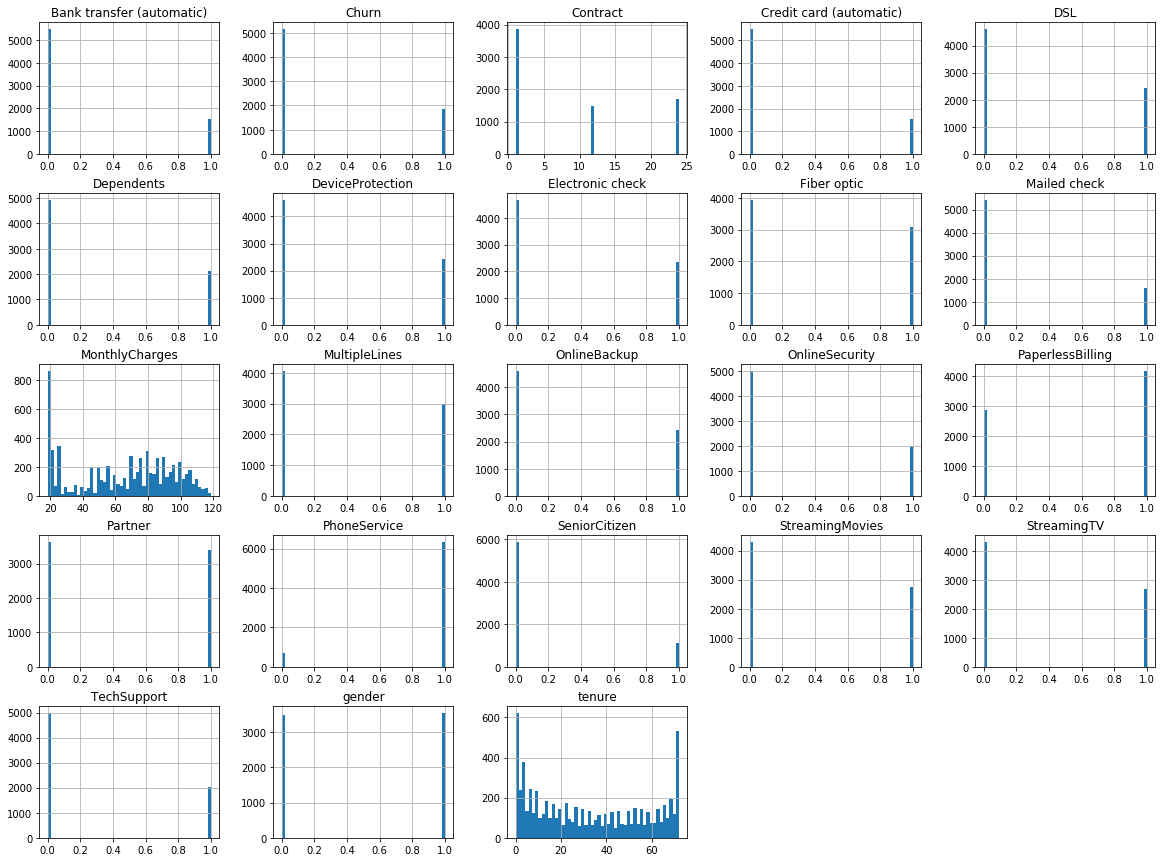

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize= (20, 15)) #take a look at our dataset on histogram

In [15]:
col_list_again

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Bank transfer (automatic)',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check',
 'DSL',
 'Fiber optic']

In [16]:
corr_matrix = df.corr()
correlation=corr_matrix['Churn'].sort_values(ascending=False)

In [17]:
correlation

Churn                        1.000000
Fiber optic                  0.308020
Electronic check             0.301919
MonthlyCharges               0.193356
PaperlessBilling             0.191825
SeniorCitizen                0.150889
StreamingTV                  0.063228
StreamingMovies              0.061382
MultipleLines                0.040102
PhoneService                 0.011942
gender                      -0.008612
DeviceProtection            -0.066160
OnlineBackup                -0.082255
Mailed check                -0.091683
Bank transfer (automatic)   -0.117937
DSL                         -0.124214
Credit card (automatic)     -0.134302
Partner                     -0.150448
Dependents                  -0.164221
TechSupport                 -0.164674
OnlineSecurity              -0.171226
tenure                      -0.352229
Contract                    -0.394453
Name: Churn, dtype: float64

# Implement Machine Learning Models

In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df['TotalCharges'] = df['TotalCharges'].replace(to_replace = " ", value=1394.55)

In [26]:
X=df.drop(['Churn'],axis=1)
Y=df['Churn']

In [27]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [35]:
#scaling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [2]:
#make Artificial neutral network
from keras.models import Sequential#for model
from keras.layers import Dense#to add preceptrons
from keras.layers import LeakyReLU, PReLU, ELU# activation function
from keras.layers import Dropout

In [41]:
model= Sequential()
#adding the imput layer and the first hidden layer
model.add(Dense(units=23, kernel_initializer='he_uniform', activation='relu', input_dim=23))

In [70]:
#second layer
model.add(Dense(units=15, kernel_initializer= 'he_uniform', activation='relu'))
#third layer
model.add(Dense(units=10, kernel_initializer= 'he_uniform', activation='relu'))
#output layer
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))


In [71]:
model.compile(optimizer= 'Adamax', loss= 'binary_crossentropy', metrics=['accuracy'])

In [72]:
model_history= model.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=50)

Train on 3774 samples, validate on 1860 samples
Epoch 1/50
3774/3774 [==============================] - 2s 443us/step - loss: 0.5816 - acc: 0.8082 - val_loss: 0.5731 - val_acc: 0.7898
Epoch 2/50
3774/3774 [==============================] - 1s 357us/step - loss: 0.4330 - acc: 0.8574 - val_loss: 0.5056 - val_acc: 0.7833
Epoch 3/50
3774/3774 [==============================] - 1s 361us/step - loss: 0.3654 - acc: 0.8601 - val_loss: 0.4894 - val_acc: 0.7882
Epoch 4/50
3774/3774 [==============================] - 1s 376us/step - loss: 0.3453 - acc: 0.8617 - val_loss: 0.4967 - val_acc: 0.7892
Epoch 5/50
3774/3774 [==============================] - 1s 360us/step - loss: 0.3351 - acc: 0.8625 - val_loss: 0.5013 - val_acc: 0.7903
Epoch 6/50
3774/3774 [==============================] - 1s 355us/step - loss: 0.3304 - acc: 0.8659 - val_loss: 0.5079 - val_acc: 0.7876
Epoch 7/50
3774/3774 [==============================] - 1s 372us/step - loss: 0.3269 - acc: 0.8667 - val_loss: 0.5194 - val_acc: 0.7828


# Model Evaluation

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


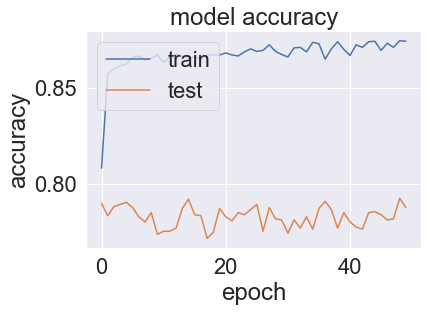

In [73]:
print(model_history.history.keys())
#summerize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

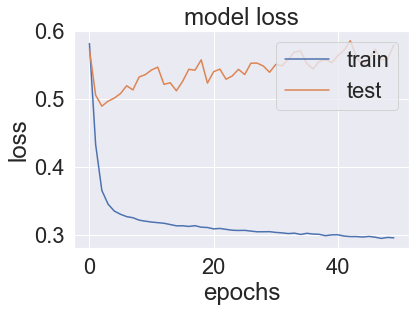

In [74]:
#summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred = (y_pred > 0.5)

In [77]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [78]:
from sklearn.metrics import confusion_matrix

In [81]:
cm=confusion_matrix(Y_test, y_pred)

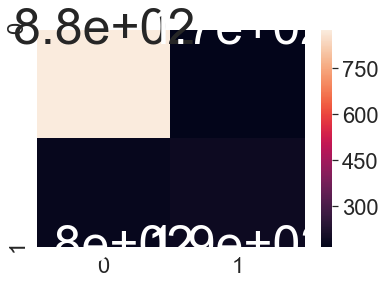

In [82]:
import seaborn as sn
# sn.heatmap(cm, annot= True)
sn.set(font_scale = 2)
sn.heatmap(cm, annot =True, annot_kws={"size":50})

plt.show()

# Final Conclusions

In [83]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)

In [84]:
score

0.7551454932576295